# Logistic Regression Analysis of Wine Data

## Import Necessary Libraries

In [307]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
warnings.filterwarnings("ignore")

## Exploratory Data Analysis

### Data Loading

In [275]:
wine_data = pd.read_csv('Wine.csv')

In [276]:
# Explore the columns and data types
print(wine_data.head())
print(wine_data.info())

   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0              1                 1            0               0          0   
1              1                 2            0               0          0   
2              1                 2            0               0          0   
3              2                 0            1               0          0   
4              1                 1            0               0          0   

   free_sulfur_dioxide  total_sulfur_dioxide  density  pH  sulphates  alcohol  \
0                    0                     0        0   2          0        0   
1                    0                     0        0   1          1        1   
2                    0                     0        0   1          0        1   
3                    0                     0        0   1          0        1   
4                    0                     0        0   2          0        0   

   quality  color  
0        1      0  
1   

### Data Cleaning

#### Data Types

In [277]:
wine_data.dtypes

fixed_acidity           int64
volatile_acidity        int64
citric_acid             int64
residual_sugar          int64
chlorides               int64
free_sulfur_dioxide     int64
total_sulfur_dioxide    int64
density                 int64
pH                      int64
sulphates               int64
alcohol                 int64
quality                 int64
color                   int64
dtype: object

#### Missing Values

In [278]:
wine_data.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

#### Outliers Detection

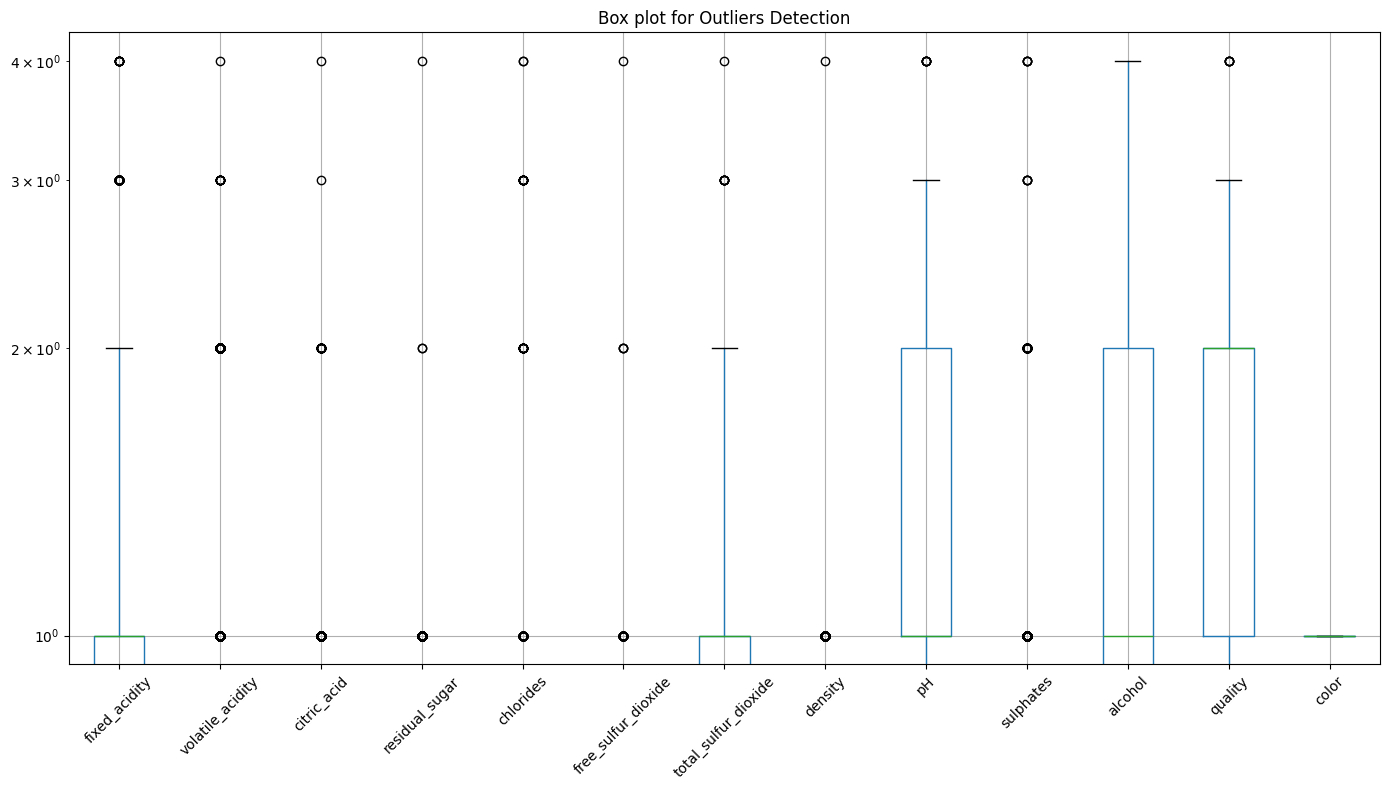

In [279]:
# Selecting numerical columns for box plot
numerical_data = wine_data.select_dtypes(include=['float64', 'int64'])

# Creating a box plot for each numerical column
plt.figure(figsize=(14, 8))
numerical_data.boxplot()
plt.title('Box plot for Outliers Detection')
plt.xticks(rotation=45)
plt.yscale('log')  # Using log scale for better visualization
plt.tight_layout()
plt.show()

#### Outliers correction

In [280]:
# Selecting numerical columns for outlier correction
numerical_data = wine_data.select_dtypes(include=['float64', 'int64'])

# Define a function to replace outliers with the median value of each column
def replace_outliers_with_median(column):
    median = column.median()
    iqr = column.quantile(0.75) - column.quantile(0.25)
    lower_bound = column.quantile(0.25) - 1.5 * iqr
    upper_bound = column.quantile(0.75) + 1.5 * iqr
    column = column.clip(lower=lower_bound, upper=upper_bound)
    column[column < lower_bound] = median
    column[column > upper_bound] = median
    return column

# Apply the outlier correction function to each numerical column
data_corrected = numerical_data.apply(replace_outliers_with_median)

# Display the corrected data
print(data_corrected)

      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               1.0                 0            0               0          0   
1               1.0                 0            0               0          0   
2               1.0                 0            0               0          0   
3               2.0                 0            0               0          0   
4               1.0                 0            0               0          0   
...             ...               ...          ...             ...        ...   
6492            0.0                 0            0               0          0   
6493            0.0                 0            0               0          0   
6494            0.0                 0            0               0          0   
6495            0.0                 0            0               0          0   
6496            0.0                 0            0               0          0   

      free_sulfur_dioxide  

## Data Profiling and Visualizations

#### Descriptive Statistics

In [281]:
wine_data.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,0.634755,0.219794,0.214253,0.026012,0.023088,0.014468,0.588579,0.022780,1.173926,0.160690,1.026936,1.792520,0.753886
std,0.654921,0.478306,0.423625,0.166740,0.200268,0.130507,0.603417,0.155279,0.682679,0.400938,0.941180,0.797772,0.430779
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,2.000000,2.000000,1.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000


#### Data Distribution

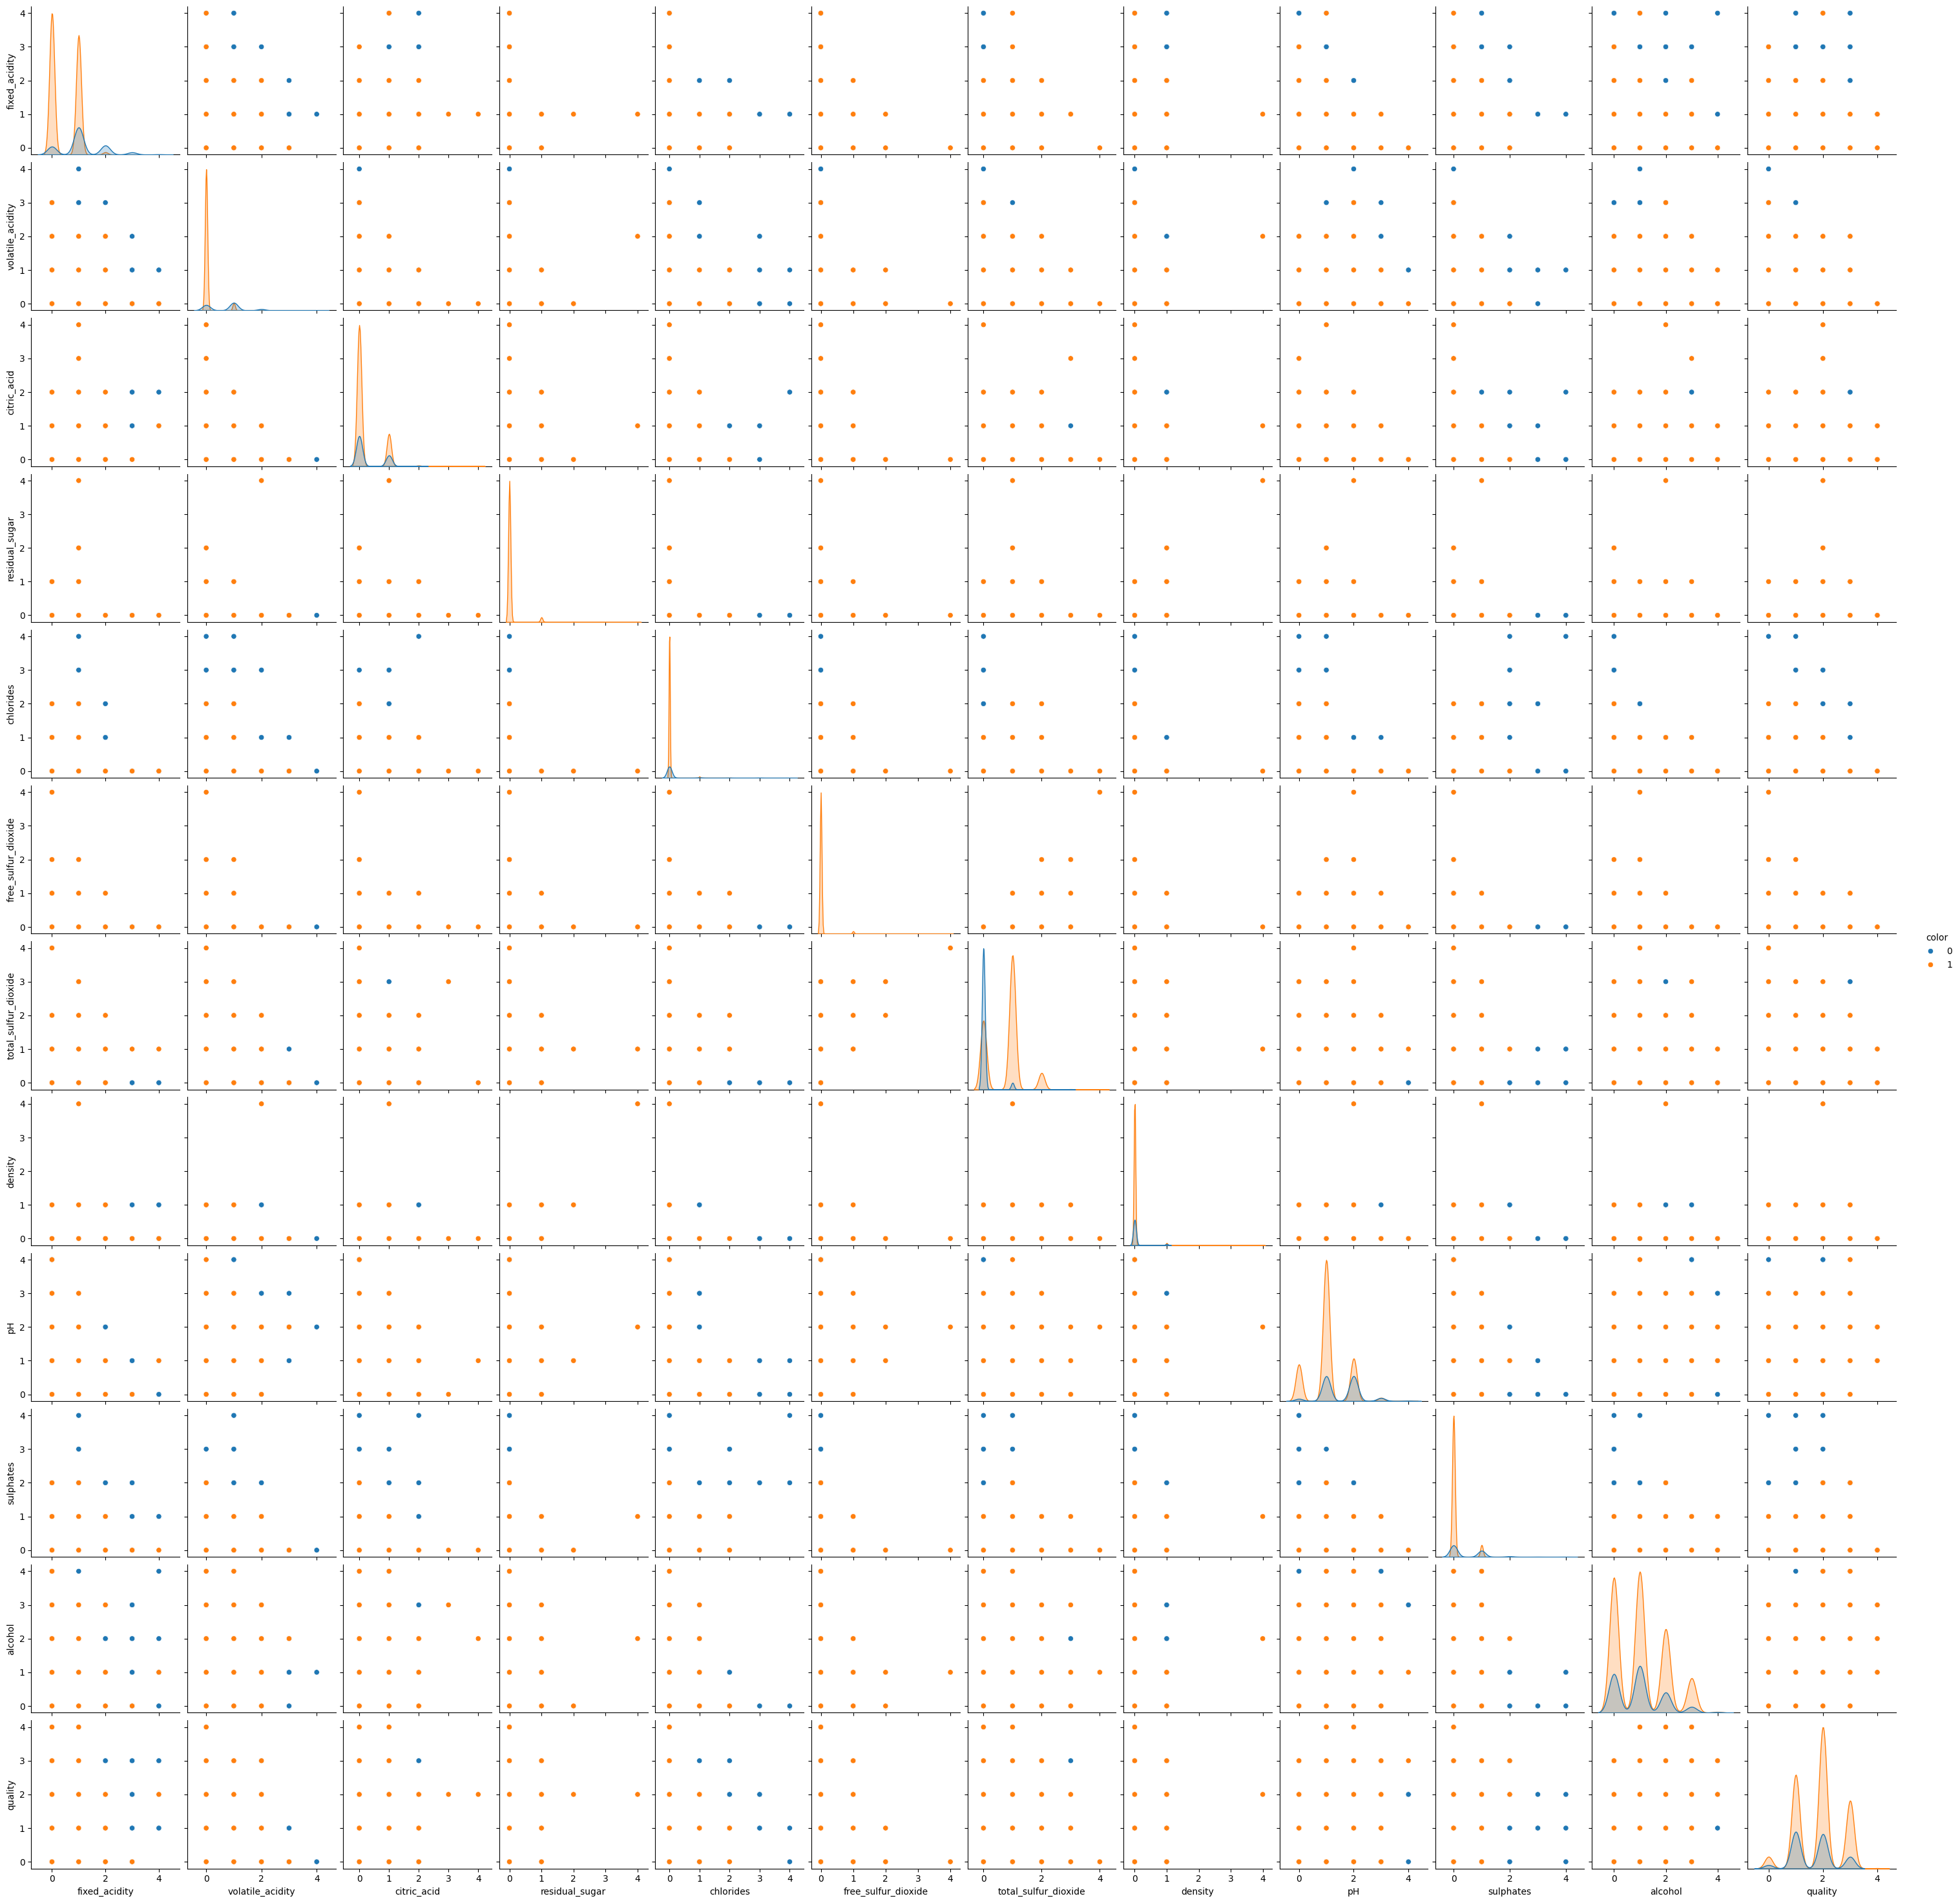

<Figure size 1000x500 with 0 Axes>

In [282]:
# Visualize distributions of features
sns.pairplot(wine_data, hue='color', diag_kind='kde')
plt.figure(figsize=(10, 5))
plt.show()

#### Correlation Matrix

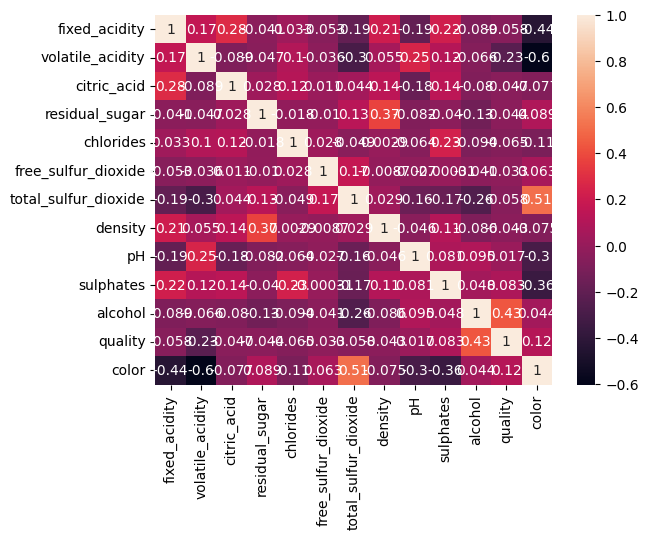

In [283]:
# Investigate relationships between numerical variables
corr = wine_data.corr()
sns.heatmap(corr, annot=True)
plt.show()

## Getting the Inputs and Outputs

In [284]:
X = wine_data.iloc[:,1:-1].values
y = wine_data.iloc[:,-1].values

In [285]:
X

array([[1, 0, 0, ..., 0, 0, 1],
       [2, 0, 0, ..., 1, 1, 1],
       [2, 0, 0, ..., 0, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 2],
       [0, 0, 0, ..., 0, 3, 3],
       [0, 0, 0, ..., 0, 2, 2]])

In [286]:
y

array([0, 0, 0, ..., 1, 1, 1])

## Build and Train the Regression Model

In [287]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [288]:
X_train

array([[1, 0, 0, ..., 0, 3, 1],
       [0, 0, 1, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 2],
       ...,
       [0, 1, 0, ..., 0, 0, 2],
       [0, 0, 0, ..., 0, 1, 3],
       [0, 1, 0, ..., 0, 1, 1]])

In [289]:
X_test

array([[0, 0, 0, ..., 0, 0, 2],
       [0, 0, 0, ..., 0, 2, 2],
       [0, 1, 0, ..., 0, 0, 2],
       ...,
       [0, 0, 0, ..., 1, 1, 3],
       [0, 0, 0, ..., 0, 3, 3],
       [0, 0, 0, ..., 0, 3, 3]])

In [290]:
y_train

array([1, 1, 1, ..., 1, 1, 1])

In [291]:
y_test

array([1, 1, 1, ..., 0, 1, 1])

#### Training the Model

In [292]:
model = LogisticRegression(random_state=0)
model

LogisticRegression(random_state=0)

In [293]:
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [294]:
train_predictions = model.predict(X_train)
X_train
test_predictions = model.predict(X_test)
X_test

array([[0, 0, 0, ..., 0, 0, 2],
       [0, 0, 0, ..., 0, 2, 2],
       [0, 1, 0, ..., 0, 0, 2],
       ...,
       [0, 0, 0, ..., 1, 1, 3],
       [0, 0, 0, ..., 0, 3, 3],
       [0, 0, 0, ..., 0, 3, 3]])

### Feature Scaling

In [295]:
# Initialize the StandardScaler with feature names
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [296]:
# Select the columns that need to be scaled
columns_to_scale = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 
                    'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
wine_data[columns_to_scale] = scaler.fit_transform(wine_data[columns_to_scale])

# Display the scaled dataset
print(wine_data)

      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0          0.557737          1.631311    -0.505799       -0.156015  -0.115292   
1          0.557737          3.722183    -0.505799       -0.156015  -0.115292   
2          0.557737          3.722183    -0.505799       -0.156015  -0.115292   
3          2.084757         -0.459561     1.854961       -0.156015  -0.115292   
4          0.557737          1.631311    -0.505799       -0.156015  -0.115292   
...             ...               ...          ...             ...        ...   
6492      -0.969283         -0.459561    -0.505799       -0.156015  -0.115292   
6493      -0.969283         -0.459561    -0.505799       -0.156015  -0.115292   
6494      -0.969283         -0.459561    -0.505799       -0.156015  -0.115292   
6495      -0.969283         -0.459561    -0.505799       -0.156015  -0.115292   
6496      -0.969283         -0.459561    -0.505799       -0.156015  -0.115292   

      free_sulfur_dioxide  

### Inference

In [297]:
# Assume X_test is a numpy array
X_test_df = pd.DataFrame(X_test, columns=columns_to_scale) 

# Use the StandardScaler to transform X_test_df
y_pred = model.predict(scaler.transform(X_test_df))

In [298]:
y_pred

array([1, 1, 1, ..., 0, 1, 1])

In [299]:
y_test

array([1, 1, 1, ..., 0, 1, 1])

### Predict the target variable 

In [308]:
# Predict the color of a new wine sample
new_sample = [[1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0]]
scaled_sample = scaler.transform(new_sample)
predicted_color = model.predict(scaled_sample)

# Map the predicted color back to 'red' or 'white'
predicted_color = 'red' if predicted_color[0] == 0 else 'white'

# Print the result of the prediction
print("Predicted color of the wine sample: {}".format(predicted_color))

Predicted color of the wine sample: red


## Evaluation Metrics

### Confusion Matrix

Text(0.5, 36.72222222222221, 'Predicted Values')

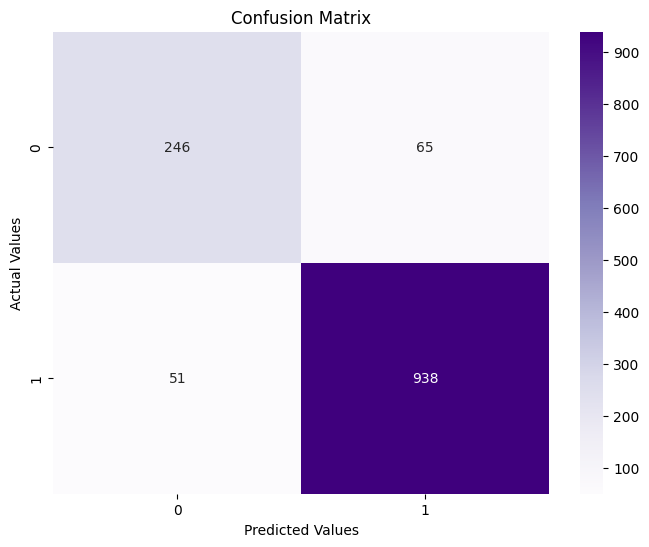

In [301]:
# Calculates the confusion matrix, which is a table that is often used to describe the performance of a classification model on a set of test data for a binary classification problem.
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')


### Accuracy

In [302]:
# Calculate the accuracy score
(246+938)/(246+938+65+51)


0.9107692307692308

In [303]:
accuracy = accuracy_score(y_test,y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.9107692307692308


## Effects of each Features to Wine Color

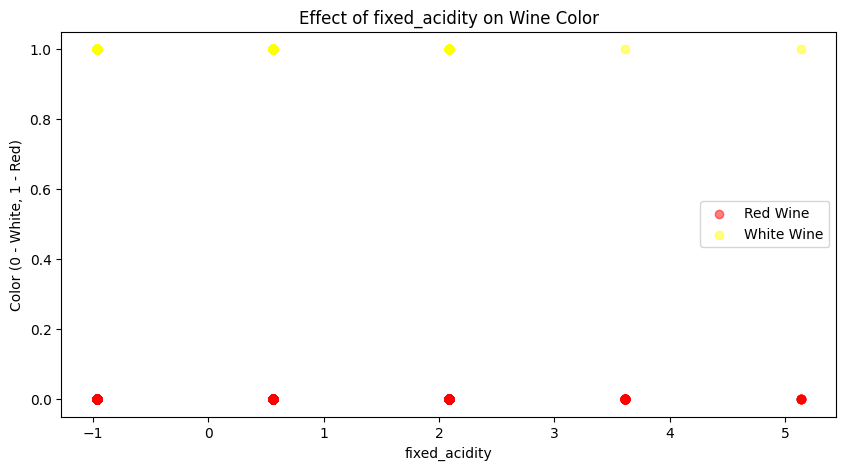

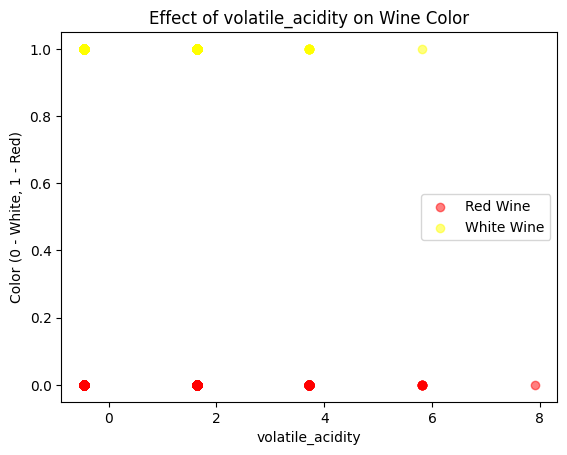

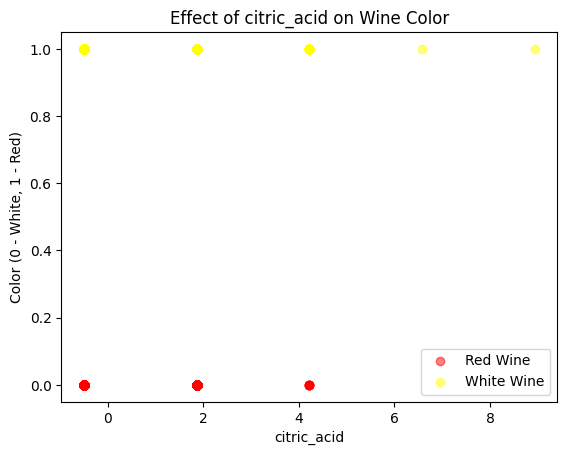

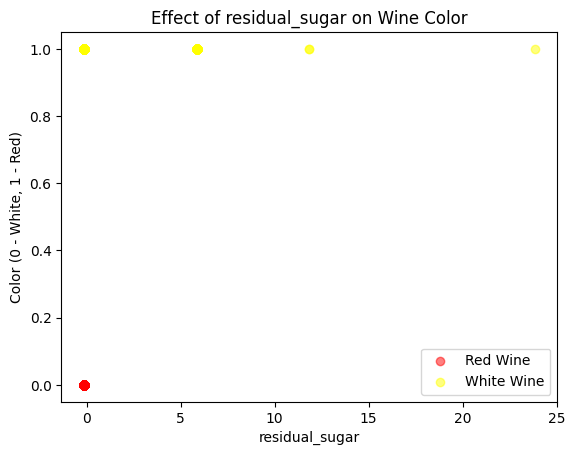

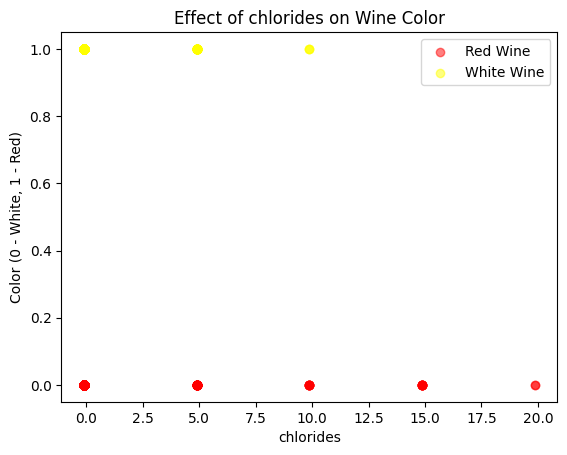

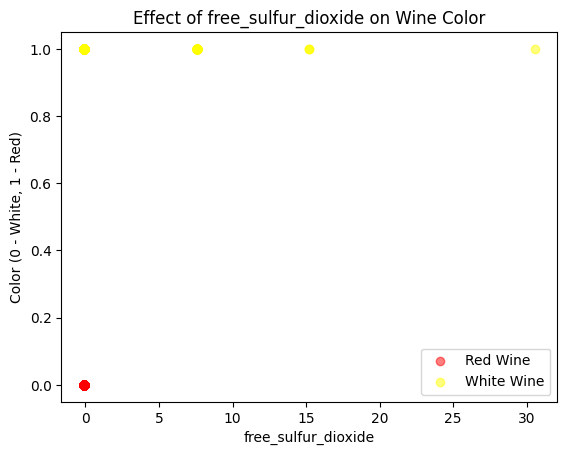

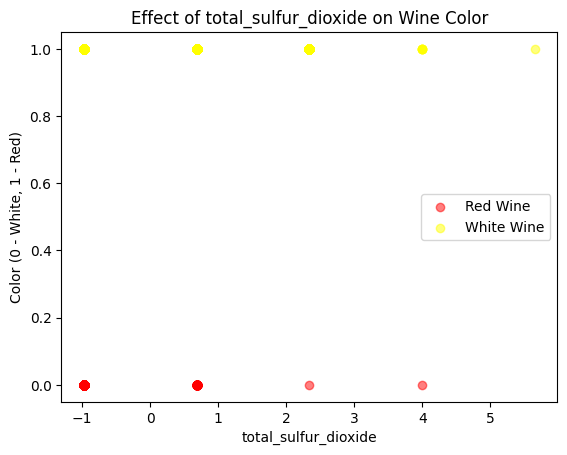

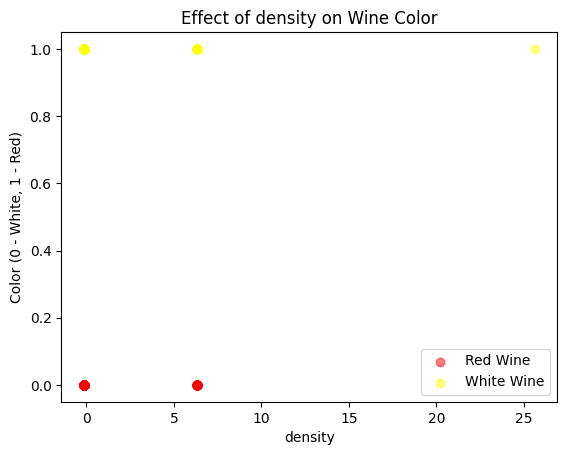

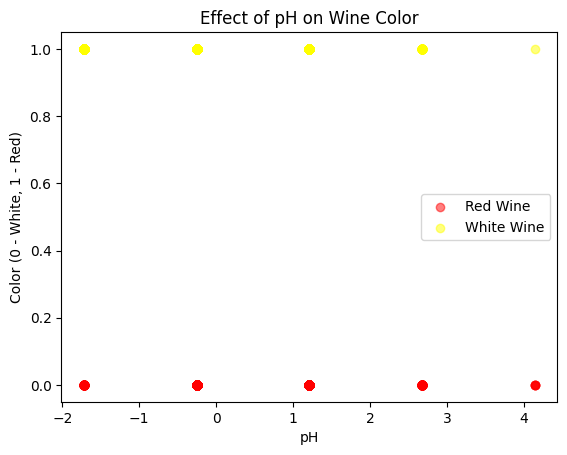

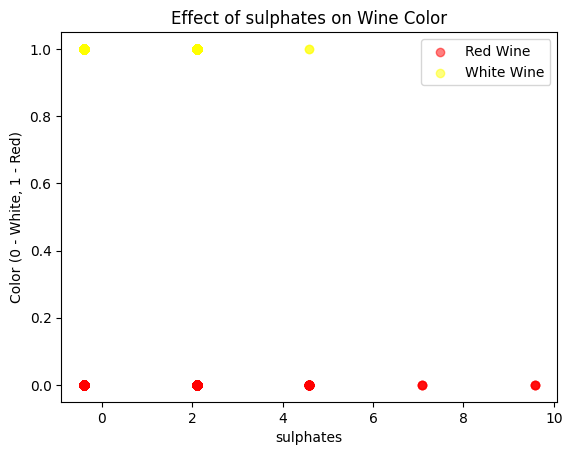

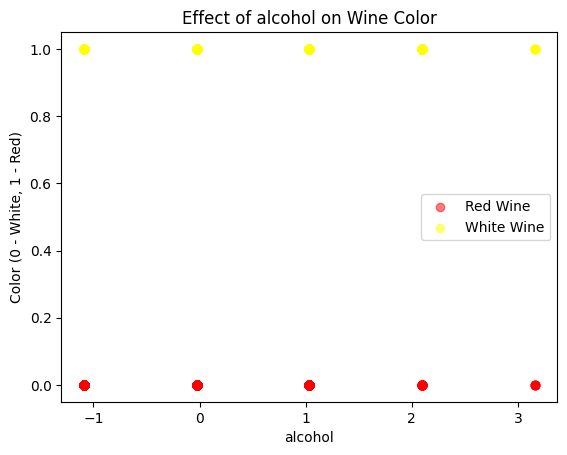

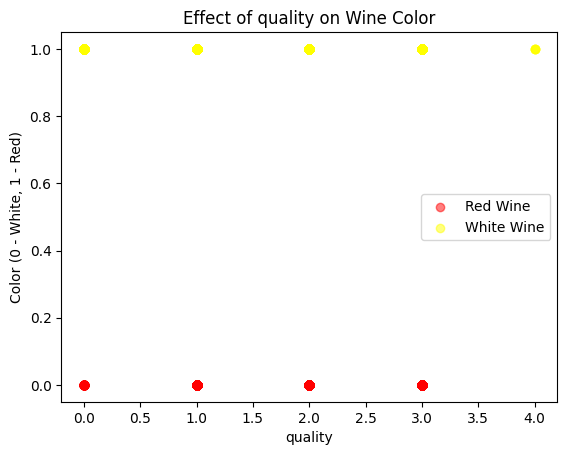

In [304]:
# Separate data based on color (red or white)
red_wines = wine_data[wine_data['color'] == 0]
white_wines = wine_data[wine_data['color'] == 1]

# Define the features to visualize
features = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

# Create a scatter plot for each feature
plt.figure(figsize=(10, 5))
for feature in features:
    plt.scatter(red_wines[feature], red_wines['color'], color='red', label='Red Wine', alpha=0.5)
    plt.scatter(white_wines[feature], white_wines['color'], color='yellow', label='White Wine', alpha=0.5)

    plt.xlabel(feature)
    plt.ylabel('Color (0 - White, 1 - Red)')
    plt.title(f'Effect of {feature} on Wine Color')
    plt.legend()
    plt.show()